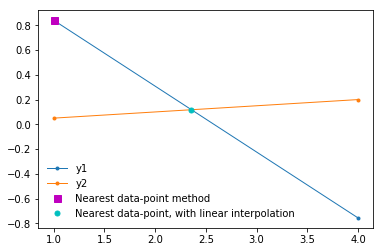

(array([[2.35814733]]), array([[0.11790737]]))

In [5]:
from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt


def interpolated_intercept(x, y1, y2):
    """Find the intercept of two curves, given by the same x data"""

    def intercept(point1, point2, point3, point4):
        """find the intersection between two lines
        the first line is defined by the line between point1 and point2
        the first line is defined by the line between point3 and point4
        each point is an (x,y) tuple.

        So, for example, you can find the intersection between
        intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

        Returns: the intercept, in (x,y) format
        """    

        def line(p1, p2):
            A = (p1[1] - p2[1])
            B = (p2[0] - p1[0])
            C = (p1[0]*p2[1] - p2[0]*p1[1])
            return A, B, -C

        def intersection(L1, L2):
            D  = L1[0] * L2[1] - L1[1] * L2[0]
            Dx = L1[2] * L2[1] - L1[1] * L2[2]
            Dy = L1[0] * L2[2] - L1[2] * L2[0]

            x = Dx / D
            y = Dy / D
            return x,y

        L1 = line([point1[0],point1[1]], [point2[0],point2[1]])
        L2 = line([point3[0],point3[1]], [point4[0],point4[1]])

        R = intersection(L1, L2)

        return R

    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
    xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
    return xc,yc


def main():
    x  = np.linspace(1, 4, 2)
    y1 = np.sin(x)
    y2 = 0.05*x

    plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
    plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

    plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

    # new method!
    xc, yc = interpolated_intercept(x,y1,y2)
    plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')


    plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')

    plt.savefig('curve crossing.png', dpi=200)
    plt.show()
    
    return xc, yc

main()

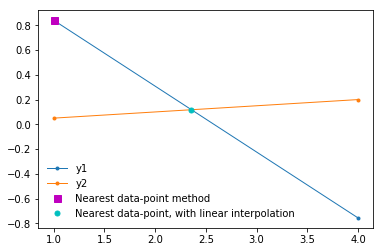

In [7]:
x  = np.linspace(1, 4, 2)
y1 = np.sin(x)
y2 = 0.05*x

plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

# new method!
xc, yc = interpolated_intercept(x,y1,y2)
plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')


plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')

plt.savefig('curve crossing.png', dpi=200)
plt.show()


In [8]:
y1 - y2

array([ 0.79147098, -0.9568025 ])